## Scikit-Learn Random Forest Models


### The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average. 

#### Pros 
- can handle large datasets 
- less influenced by outliers in the data
- no assumptions about underlying distributions in the data
- can implicitly handle collinearity in features, highly similar features 
- work well with heterogeneous features, categorical and numerical, mixing different range values 

#### Cons
- robust algorithm makes it more complex tougher to analyze small details 
- not best to determine feature and target relationships/effects due to working with highly similar features

### Model Set Up

#### Steps
 - load the data
 - determine regression or classification target
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### Single-linear Rergression
 - a straight-line fit to data
 - simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥
 - y = ax+b, where a is commonly known as the slope, and b is commonly known as the intercept

#### Multi-Linear Regression
 - a straight-line fit to data
 - multiple or multivariate linear regression icd s a case of linear regression with two or more independent variables

#### Polynomial-Linear Regression
 - a curved-line fit to data
 - a generalized case of linear regression 
 - assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function

#### Ridge Regression
 - 
 - 
 - 

#### Lasso Regression
 - 
 - 
 - 

#### ElasticNet Regression
 - 
 - 
 - 



#### RandomForest Regression Models 

##### Import + Inspect

In [1]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/RFM_Notes/petrol_consumption.csv') # read in the file 
print('data frame shape:', df.shape) # show the data frame shape 
df.head() # show the data frame 

data frame shape: (48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) # show the data columns 
print('--- types --- ')
print(df.dtypes) # show the data types 
print('--- NA counts --- ')
print(df.isna().sum()) # show any Nan's in the data
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')
--- types --- 
Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object
--- NA counts --- 
Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64
--- numericals descriptions --- 


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [3]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


--- feature correlations heatmap ---


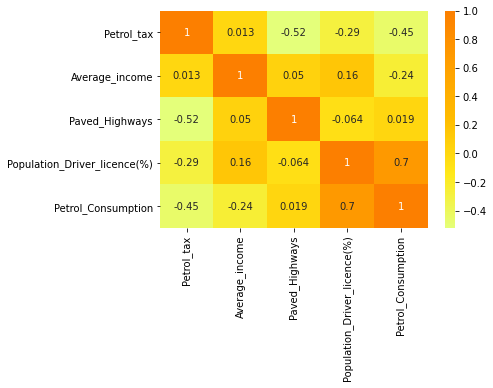

In [4]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- scatter plots ---


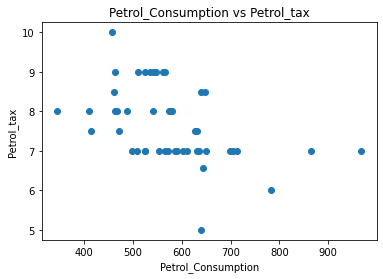

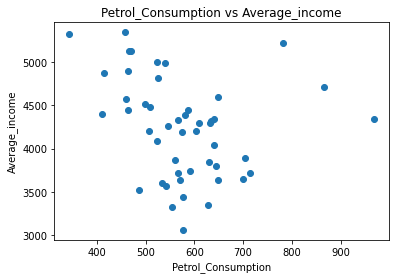

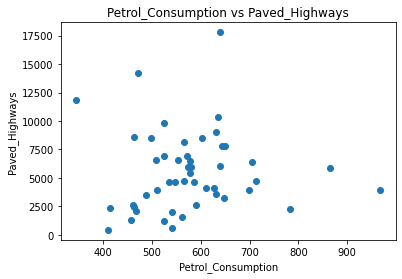

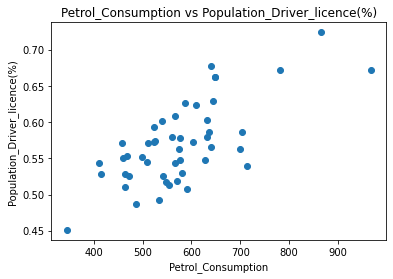

In [5]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'Petrol_Consumption' # set the target
features_ = df.iloc[:, 0:4] # set the features
print('--- scatter plots ---')
for feature in features_:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

##### Encode + Clean + Organize


In [6]:
### encoding not necessary with this example, all are numericals ###

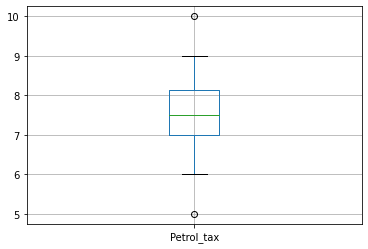

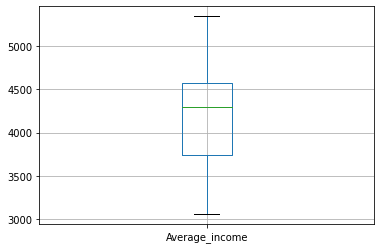

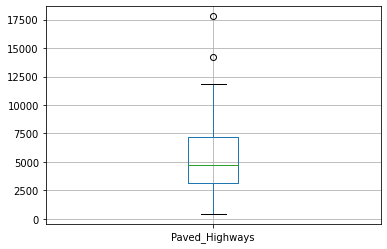

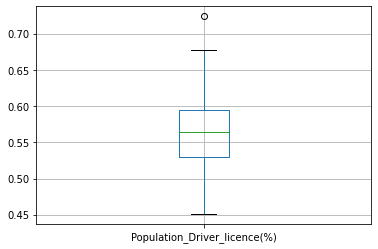

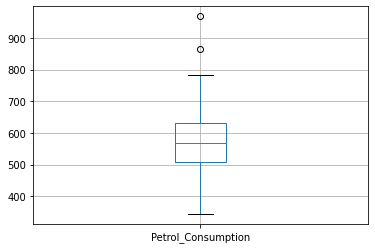

In [6]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    df.boxplot([column]) # set data

In [7]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] # list for outliers 
    zscore = [] # list for scores 
    threshold = 3.5 # set threshold 
    mean = np.mean(data) # mean 
    std = np.std(data) # standard deviaton
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the list
        if np.abs(z_score) > threshold: # if the score is greater than the threshold
            outliers.append(i) # append z_score the list 
    print(outliers) # show the outliers 
    return len(outliers), outliers

In [10]:
### run each feature 'wanted' through the function ### 
Average_income_outliers_number, Average_income_outliers = outlier_zscore(df.Average_income)
Paved_Highways_outliers_number, Paved_Highways_outliers = outlier_zscore(df.Paved_Highways)
Population_Driver_licence_outliers_number, Population_Driver_licence_outliers = outlier_zscore(df['Population_Driver_licence(%)'])
Petrol_Consumption_outliers_number, Petrol_Consumption_outliers = outlier_zscore(df.Petrol_Consumption)

[]
[17782]
[]
[968]


In [11]:
### removal of outliers per feature ###
for num, i in enumerate(df['Paved_Highways']): # removing the outliers of 'bmi' 
    if i in Paved_Highways_outliers:
        df['Paved_Highways'][num] = 14382 # 3.5 under the lowest outlier
for num, i in enumerate(df['Petrol_Consumption']): # removing the outliers of 'charges'
    if i in Petrol_Consumption_outliers:
        df['Petrol_Consumption'][num] = 933 # 3.5 under the lowest outlier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
### split the data into features & target sets ###
X = df.iloc[:, 0:4].values # set the features
y = df.iloc[:, 4].values # set the target 
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

X shape: (48, 4)
y shape: (48,)


In [13]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 train/test

##### Random Forest Regression
 - GridSearch CV
 - RandomSearch CV

In [14]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [15]:
### random forest regression model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model1 = RandomForestRegressor(n_estimators=20, # 20 estimators for # of trees
                              random_state=0)
model1.fit(X_train, y_train) # fit the data on the model 
y_pred = model1.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534            574.10
1          410            512.85
2          577            604.80
3          571            589.75
4          577            625.40
--- model metrics ---
mean absolute error: 51.795
mean squared error: 4157.400749999999
root mean squared error: 64.47790900765935
r2 score : 0.29047814296246754
model score: 0.9399474873209389
model accuracy: 29.047814296246756%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


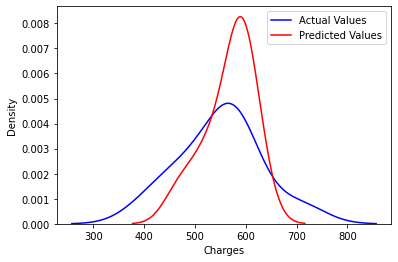

In [16]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### GridSearch CV

In [18]:
### random forest regressor + gridsearch CV model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model1 = RandomForestRegressor()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200], # 
            'max_features': ['auto', 'sqrt', 'log2'], # 
            'max_leaf_nodes' : [2, 6, 10], # 
            'max_depth' : [5, 15, 25], # 
            'min_samples_split' : [2, 10, 15], # 
            'bootstrap': [True, False], # 
              }
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3) 
%time CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

CPU times: user 2min 26s, sys: 537 ms, total: 2min 26s
Wall time: 2min 27s


{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [19]:
### random forest regression model + grid best params ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model1 = RandomForestRegressor(bootstrap= True,
                                max_depth= 25,
                                max_features= 'log2',
                                max_leaf_nodes= 10,
                                min_samples_split= 2,
                                n_estimators= 200)
model1.fit(X_train, y_train) # fit the data on the model 
y_pred = model1.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534        559.236004
1          410        506.724797
2          577        596.647743
3          571        590.859897
4          577        602.738718
--- model metrics ---
mean absolute error: 45.03506731875159
mean squared error: 3102.2458184382194
root mean squared error: 55.69780802184427
r2 score : 0.4705559202862015
model score: 0.9209292770161892
model accuracy: 47.055592028620154%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


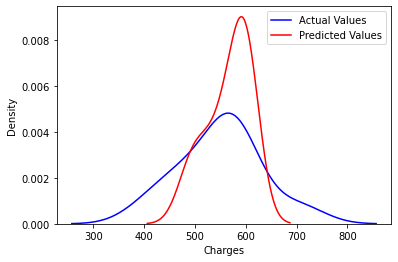

In [20]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### RandomizedSearch CV

In [21]:
### random forest regressor + randomized search CV model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model2 = RandomForestRegressor()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200], # 
            'max_features': ['auto', 'sqrt', 'log2'], # 
            'max_leaf_nodes' : [2, 6, 10], # 
            'max_depth' : [5, 15, 25], # 
            'min_samples_split' : [2, 10, 15], # 
            'bootstrap': [True, False], # 
              }
CV_rfc = RandomizedSearchCV(model2, param_grid, cv=3) 
%time CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

CPU times: user 3.46 s, sys: 17 ms, total: 3.48 s
Wall time: 3.48 s


{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_samples_split': 10,
 'n_estimators': 200}

In [22]:
### random forest regression model + randomized best params ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model2 = RandomForestRegressor(bootstrap= False,
                                max_depth= 25,
                                max_features= 'sqrt',
                                max_leaf_nodes= 10,
                                min_samples_split= 10,
                                n_estimators= 200)
model2.fit(X_train, y_train) # fit the data on the model 
y_pred = model2.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model2.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534        541.137974
1          410        492.671421
2          577        610.208488
3          571        557.832542
4          577        613.048115
--- model metrics ---
mean absolute error: 44.57007738095235
mean squared error: 3098.9746399591363
root mean squared error: 55.66843486177006
r2 score : 0.4711141952201684
model score: 0.8515362801164758
model accuracy: 47.11141952201684%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


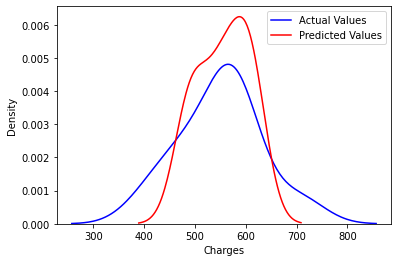

In [23]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

#### Random Forest Classification Models


##### Import + Inspect the Data

In [24]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/RFM_Notes/bill_authentication.csv') # read in the file 
print('data frame shape:', df.shape) # show the data frame shape 
df.head() # show the data frame 

data frame shape: (1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [25]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) # show the data columns 
print('--- types --- ')
print(df.dtypes) # show the data types 
print('--- NA counts --- ')
print(df.isna().sum()) # show any Nan's in the data
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')
--- types --- 
Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object
--- NA counts --- 
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64
--- numericals descriptions --- 


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [26]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


--- feature correlations heatmap ---


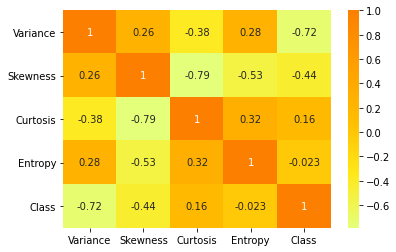

In [27]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- scatter plots ---


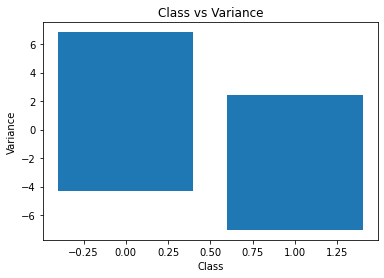

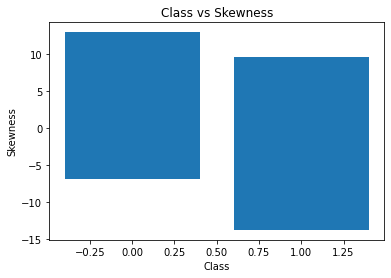

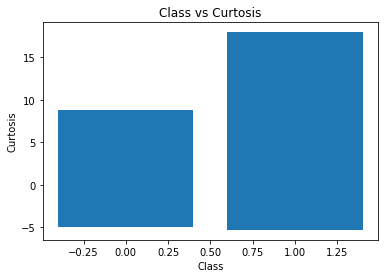

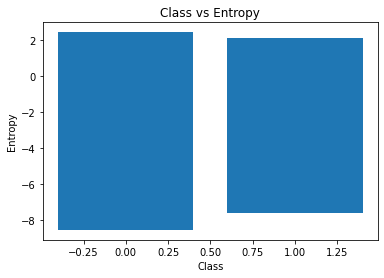

In [28]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'Class' # set the target
features_ = df.iloc[:, 0:4] # set the features
print('--- scatter plots ---')
for feature in features_:
    figure = plt.figure
    ax = plt.gca()
    ax.bar(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

##### Encode + Clean + Organize




In [ ]:
### encoding not necessary with this example, all are numericals ###

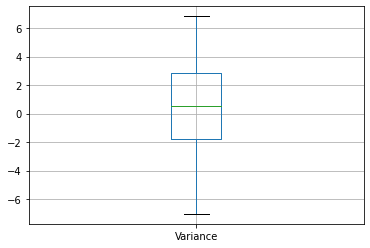

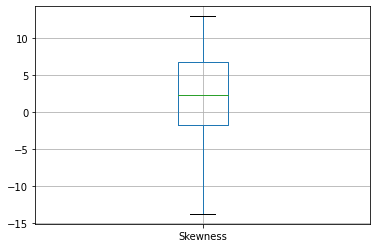

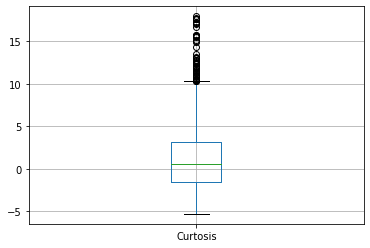

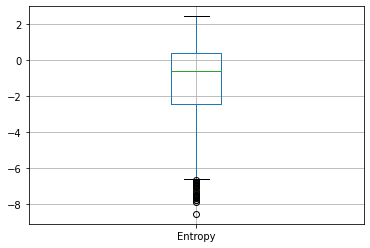

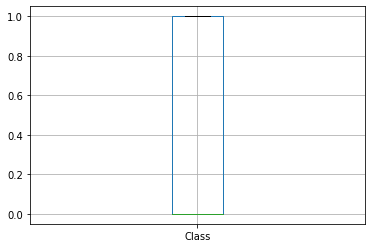

In [29]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    df.boxplot([column]) # set data

In [30]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] # list for outliers 
    zscore = [] # list for scores 
    threshold = 3.5 # set threshold 
    mean = np.mean(data) # mean 
    std = np.std(data) # standard deviaton
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the list
        if np.abs(z_score) > threshold: # if the score is greater than the threshold
            outliers.append(i) # append z_score the list 
    print(outliers) # show the outliers 
    return len(outliers), outliers

In [31]:
### run each feature 'wanted' through the function ### 
Variance_outliers_number, Variance_outliers = outlier_zscore(df.Variance)
Skewness_outliers_number, Skewness_outliers = outlier_zscore(df.Skewness)
Curtosis_outliers_number, Curtosis_outliers = outlier_zscore(df.Curtosis)
Entropy_outliers_number, Entropy_outliers = outlier_zscore(df.Entropy)
Class_outliers_number, Class_outliers = outlier_zscore(df.Class)

[]
[]
[17.6772, 17.3087, 17.9274, 16.9583, 17.5795, 17.6052, 17.1116, 17.0834, 16.7166, 17.5932]
[-8.5482]
[]


In [32]:
### removal of outliers per feature ###
for num, i in enumerate(df['Curtosis']): # removing the outliers of 'bmi' 
    if i in Curtosis_outliers:
        df['Curtosis'][num] = 13.3 # 3.5 under the lowest outlier
for num, i in enumerate(df['Entropy']): # removing the outliers of 'charges'
    if i in Entropy_outliers:
        df['Entropy'][num] = -5.2 # 3.5 under the lowest outlier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
### split the data into features & target sets ###
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

X shape: (1372, 4)
y shape: (1372,)


In [34]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 train/test

In [35]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

#### Random Forest Classification
 - GridSearch CV
 - RandomSearch CV

In [36]:
### random forest classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model3 = RandomForestClassifier()
model3.fit(X_train, y_train) # fit the data on the model 
y_pred = model3.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score = {}".format(score)) # show the r2 score
print('model score=', model3.score(X_train, y_train)) # show the model score 
print("model accuracy= {}%".format(score * 100)) # show the model accuracy
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_test,y_pred))
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_pred))
print('model accuracy score=', metrics.accuracy_score(y_test, y_pred))

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            1                 1
1            0                 0
2            1                 1
3            0                 0
4            0                 0
--- model metrics ---
r2 score = 0.9406239879088848
model score= 1.0
model accuracy= 94.06239879088848%
--- confusion matrix ---
[[155   2]
 [  2 116]]
--- classification report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

model accuracy score= 0.9854545454545455


###### GridSearch CV

In [37]:
### random forest classifier + gridsearch CV model ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model3 = RandomForestClassifier()
param_grid = {  # create the param grid 
    'n_estimators': [20, 100, 200], # 
    'max_features': ['auto', 'sqrt', 'log2'], # 
    'max_leaf_nodes' : [2, 6, 10], # 
    'max_depth' : [5, 15, 25], # 
    'min_samples_split' : [2, 10, 15], # 
    'bootstrap': [True, False], # 
    'criterion' :['gini', 'entropy'] # 
    }
CV_rfc = GridSearchCV(estimator=model3, param_grid=param_grid, cv=3) 
%time CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

CPU times: user 9min 12s, sys: 1.47 s, total: 9min 14s
Wall time: 9min 15s


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_split': 15,
 'n_estimators': 200}

In [38]:
### random forest classifier + grid best params ###
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model3 = RandomForestClassifier(bootstrap= True,
                                criterion= 'entropy',
                                max_depth= 15,
                                max_features= 'auto',
                                max_leaf_nodes= 10,
                                min_samples_split= 15,
                                n_estimators= 200)
model3.fit(X_train, y_train) # fit the data on the model 
y_pred = model3.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score = {}".format(score)) # show the r2 score
print('model score=', model3.score(X_train, y_train)) # show the model score 
print("model accuracy= {}%".format(score * 100)) # show the model accuracy
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_test,y_pred))
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_pred))
print('model accuracy score=', metrics.accuracy_score(y_test, y_pred))

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            1                 1
1            0                 0
2            1                 1
3            0                 0
4            0                 0
--- model metrics ---
r2 score = 0.8664039727949908
model score= 0.9872379216043756
model accuracy= 86.64039727949908%
--- confusion matrix ---
[[150   7]
 [  2 116]]
--- classification report ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       157
           1       0.94      0.98      0.96       118

    accuracy                           0.97       275
   macro avg       0.96      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

model accuracy score= 0.9672727272727273


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


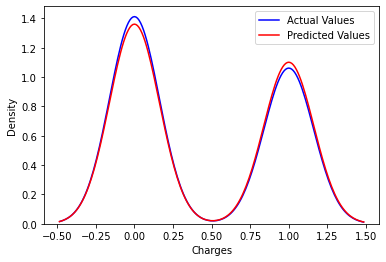

In [39]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### RandomSearch CV

In [40]:
### random forest classifier + randomizedsearch CV model ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
model3 = RandomForestClassifier()
param_grid = {  # create the param grid 
    'n_estimators': [20, 100, 200], # 
    'max_features': ['auto', 'sqrt', 'log2'], # 
    'max_leaf_nodes' : [2, 6, 10], # 
    'max_depth' : [5, 15, 25], # 
    'min_samples_split' : [2, 10, 15], # 
    'bootstrap': [True, False], # 
    'criterion' :['gini', 'entropy'] # 
    }
CV_rfc = RandomizedSearchCV(model3, param_grid, cv=3) 
%time CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

CPU times: user 5.21 s, sys: 13 ms, total: 5.22 s
Wall time: 5.23 s


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_split': 15,
 'n_estimators': 100}

In [41]:
### random forest classifier + randomized best params model ###
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model3 = RandomForestClassifier(bootstrap= False,
                                criterion= 'entropy',
                                max_depth= 25,
                                max_features= 'auto',
                                max_leaf_nodes= 10,
                                min_samples_split= 15,
                                n_estimators= 100)
model3.fit(X_train, y_train) # fit the data on the model 
y_pred = model3.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model3.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_test,y_pred))
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_pred))
print('model accuracy score:', metrics.accuracy_score(y_test, y_pred))

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            1                 1
1            0                 0
2            1                 1
3            0                 0
4            0                 0
--- model metrics ---
r2 score : 0.8960919788405485
model score: 0.9927073837739289
model accuracy: 89.60919788405485%
--- confusion matrix ---
[[152   5]
 [  2 116]]
--- classification report ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.96      0.98      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.97      0.97      0.97       275

model accuracy score: 0.9745454545454545


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


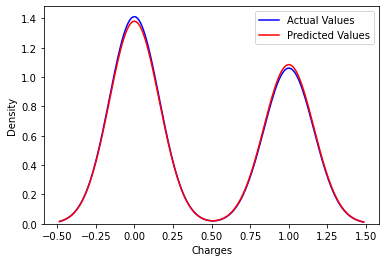

In [42]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()